In [2]:
import pandas as pd
data = pd.read_csv('datasetarq.csv')
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
print(data.isnull().sum())

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64


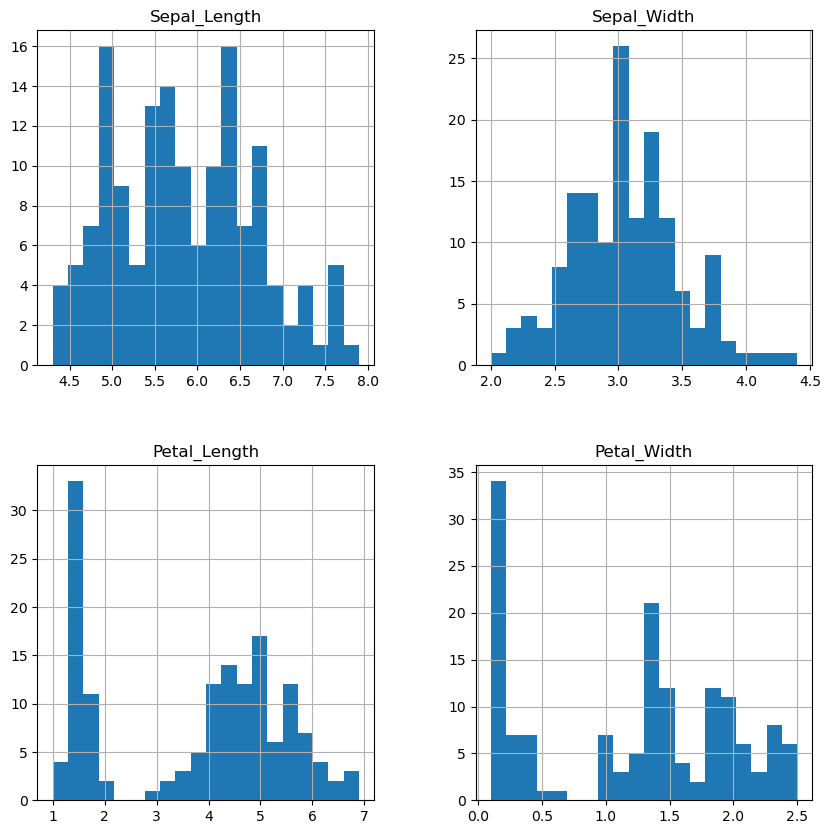

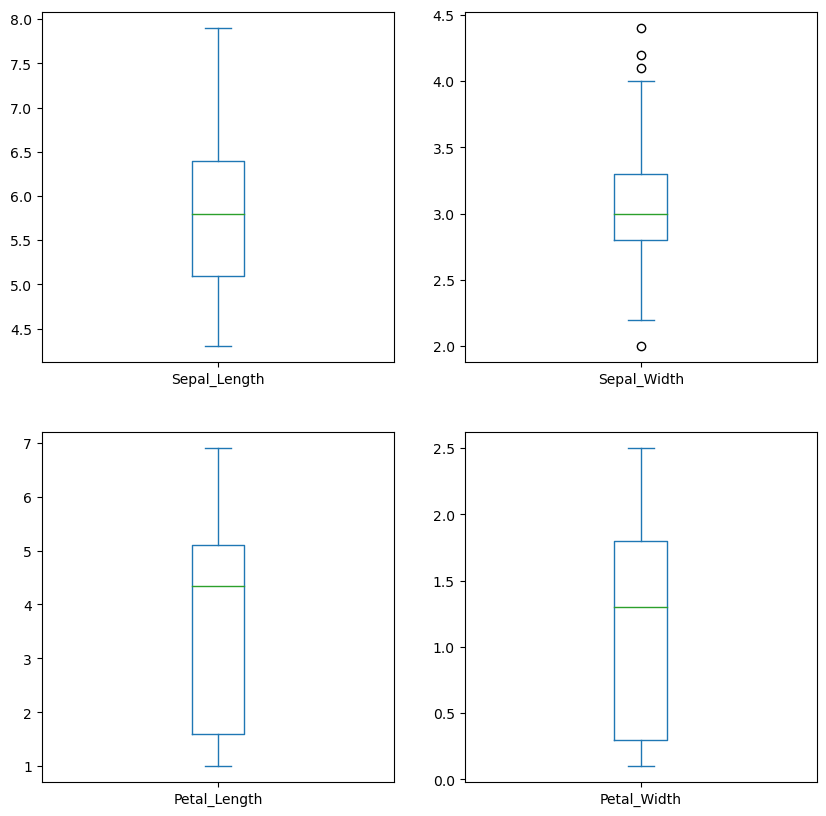

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

 
data.hist(bins=20, figsize=(10, 10))
plt.show()

 
data.plot(kind='box', subplots=True, layout=(2,2), figsize=(10, 10), sharex=False, sharey=False)
plt.show()


In [11]:
print(data.columns)

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')


In [15]:
 
data.dropna(inplace=True)


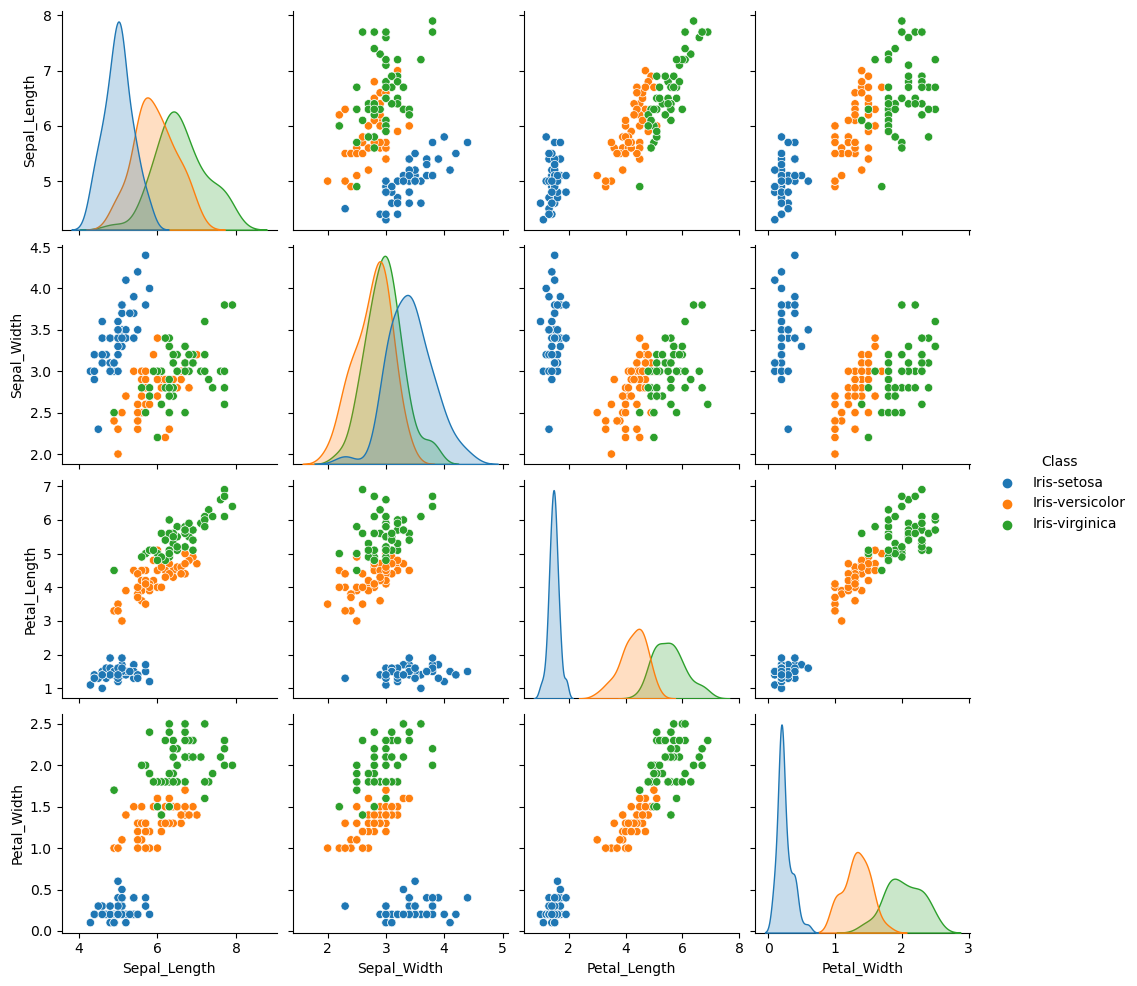

In [21]:

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")


sns.pairplot(data, hue='Class')
plt.show()


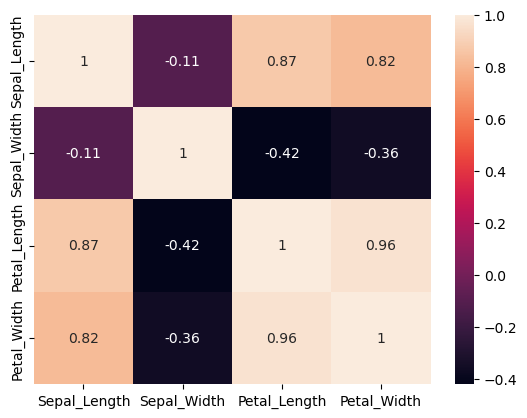

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

 
numeric_data = data[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]


correlation_matrix = numeric_data.corr()

 
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [22]:

features = data[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]
target = data['Class']


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

 
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_pred = model.predict(X_test)

 
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [25]:

new_data = pd.DataFrame({
    'Sepal_Length': [5.1],
    'Sepal_Width': [3.5],
    'Petal_Length': [1.4],
    'Petal_Width': [0.2]
})

 
prediction = model.predict(new_data)
print('Predicted class:', prediction)


Predicted class: ['Iris-setosa']


In [27]:
from sklearn.model_selection import cross_val_score

# التحقق من الأداء باستخدام Cross-Validation
cv_scores = cross_val_score(best_model, features, target, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())


Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Cross-Validation Score: 0.9666666666666668


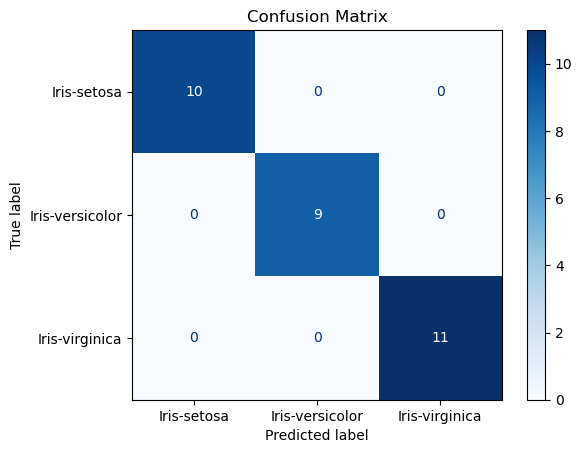

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# توقع النتائج باستخدام مجموعة الاختبار
y_pred = best_model.predict(X_test)

# حساب مصفوفة الالتباس
conf_matrix = confusion_matrix(y_test, y_pred)

# رسم مصفوفة الالتباس
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# إعداد المعلمات المراد تحسينها
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# تهيئة النموذج و GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# أفضل معلمات
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# إعادة تدريب النموذج باستخدام أفضل معلمات
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}


RandomForestClassifier(max_depth=4, n_estimators=200)